## ESG Rating for 30 Companies


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Introduction
- Environmental, Social, and Governance (ESG) ratings are critical indicators of a company's sustainability and societal impact. Investors, stakeholders, and regulatory bodies increasingly rely on ESG ratings to make informed decisions. However, predicting these ratings accurately remains a complex challenge due to the multifaceted nature of ESG factors and their interactions.

### 2) Problem statement
- The objective of this project is to develop a machine learning model capable of accurately predicting the ESG ratings of major companies based on a comprehensive dataset comprising financial metrics, market performance indicators, and specific ESG-related scores. This model aims to provide a reliable tool for investors and stakeholders to assess a company's ESG performance, thus facilitating better investment decisions and promoting corporate responsibility.

### 3) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/jenniferaduffy/esg-ratings-and-stock-data-for-dow-30-companies
- The data consists of 46 column and 30 rows.

### 4) Scope
- This project will focus on 30 major companies across various industries. The dataset will include financial metrics, market performance indicators, and specific ESG-related scores. The project will not only aim to predict overall ESG ratings but also provide insights into the individual components of ESG (Environmental, Social, and Governance).

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/ESG.csv')

#### Show Top 5 Records

In [3]:
df.head()

,Unique_id,Symbol,Company_name,GIC_sector,GIC_industry_group,GIC_Industry,GIC_Subindustry,Address,ESG_pulse,ESG_beta,...,Return on equity,Trailing Price-to-sales,Average volume.1,Market cap.1,Full-time Employees,isin,cusip,Securities_type,Currency_code,url
0,190179,MMM,3M Company,Industrials,Capital Goods_2010,Industrial_Conglomerates_201050,Industrial Conglomerates,"3M Center, St. Paul, MN, United States, 55144",-0.083992,0.010832,...,-0.69286,1.707720,5154093,5.576219e+10,85000.0,US88579Y1010,88579Y101,Common Stock,USD,http://www.3m.com
1,191352,AMZN,"Amazon.com, Inc",Consumer Discretionary,Consumer Discretionary Distribution & Retail_2550,Broadline Retail_255030,Internet & Direct Marketing Retail,"410 Terry Avenue North, Seattle, WA, United St...",-0.070006,-0.290638,...,0.20305,3.220419,38309514,1.902430e+12,1525000.0,US0231351067,023135106,Common Stock,USD,http://www.amazon.com
2,189866,AXP,American Express Company,Financials,Financial Services_4020,Consumer Finance_402020,Consumer Finance,"200 Vesey Street, New York, NY, United States,...",0.163157,0.074574,...,0.32855,2.898931,2859561,1.649430e+11,74600.0,US0258161092,025816109,Common Stock,USD,http://www.americanexpress.com
3,191511,AMGN,Amgen Inc,Health Care,"Pharmaceutivals, Biotechnology & Life Sciences...",Biotechnology_352010,Biotechnology,"One Amgen Center Drive, Thousand Oaks, CA, Uni...",-0.214992,-0.109027,...,0.72575,5.558166,2441039,1.641440e+11,26700.0,US0311621009,031162100,Common Stock,USD,http://www.amgen.com
4,191469,AAPL,Apple Inc,Information Technology,Technology Hardware & Equipment_4520,"Technology Hardware, Storage & Peripherals_452020","Technology Hardware, Storage & Peripherals","One Apple Park Way, Cupertino, CA, United Stat...",-0.084335,0.191458,...,1.47250,8.610445,65173339,3.285940e+12,150000.0,US0378331005,037833100,Common Stock,USD,http://www.apple.com


#### Shape of the dataset

In [4]:
df.shape

(30, 46)

### 2.2 Dataset information

- Unique_id: Unique ids are extracted from ESGAnalytics.io for the companies that they track
- Symbol: stock market/ ticker symbol
- Company_name: The company name as extracted from ESGAnalytics.io or Yahoo Finance
- GIC_sector: a method for assigning companies to a specific economic sector and industry group that best defines its business operations. 
- GIC_industry_group
- GIC_Industry
- GIC_Subindustry: ssigns each company to a sub-industry, and to a corresponding industry, industry group, and. sector, according to the definition of its principal business activity
- Address: Company headquarters address
- ESG_pulse: score stands for Environmental, Social, and Governance score. It is used by investors and organizations to evaluate a company's performance in these three areas, which are considered important for sustainable and responsible investing. 
- ESG_beta: shows affect of ESG score on stock price
- SNP: S&P Global composite ESG rating, updated 2023
- SNP-environmental: S&P Global's environmental score for the company
- SNP-environmental industry mean: Industry mean environmental score
- SNP-social: S&P Global's social score for the company
- SNP-social industry mean: Industry mean social score
- SNP-governance: S&P Global's governance score for the company
- SNP governance industry mean: Industry mean governance score
- Sustainalytics: ESG score given by Sustainalytics based on a scale of 1-100 (100 being best score possible)
- MSCI: ESG score given by MSCI with AAA being best score and CCC being the worst
- SNP_normalized: Normalized by ESGAnalytics.io to make it comparable to Sustaiinalytics and MSCI
- Sustainalytics_normalized: Normalized by ESGAnalytics.io to make it comparable to S&P Global and MSCI
- MSCI_normalized: Normalized by ESGAnalytics.io to make it comparable to S&P Global and Sustainalytics
- Company long: Formal name of the company
- Exchange: Which stock exchange the company is listed on only one exchange listed per each company although they may be 
- Average volume: Average sales volume per Yahoo Finance
- Market cap: the total value of a company's shares of stock.
- Current price: Stock price the last week of June 2024 per Yahoo Finance
- Debt-to-equity: is a financial metric used to evaluate a company's leverage by comparing its total debt to total shareholder's equity.
- Trailing P/E: Pulled the last week of June from Yahoo Finance
- Forward P/E: Pulled the last week of June from Yahoo Finance
- 52-week low: 
- 52-week high: 
- 52-week change: 
- Shares outstanding:
- PEG ratio: 
- Price-to-book: 
- Return on equity: 
- Trailing Price-to-sales: 
- Average volume: 
- Market cap: 
- Full-time Employees: 
- isin: 
- cusip: 
- Securities_type: 
- Currency_code: 
- url: From Yahoo Finance

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

Unique_id                          0
Symbol                             0
Company_name                       0
GIC_sector                         0
GIC_industry_group                 0
GIC_Industry                       0
GIC_Subindustry                    0
Address                            0
ESG_pulse                          0
ESG_beta                           1
SNP                                3
SNP-environmental                  2
SNP-environmental industry mean    2
SNP-social                         2
SNP-social industry mean           2
SNP-governance                     2
SNP governance industry mean       2
Sustainalytics                     2
MSCI                               3
SNP_normalized                     3
Sustainalytics_normalized          2
MSCI_normalized                    3
Company (long) name                0
Exchange                           0
Average volume                     0
Market cap                         0
Current price                      0
D

### 3.2 Droping The Uneccessary Columns

In [10]:
columns_to_drop = [
    'Unique_id', 'Symbol', 'Company_name', 'Address', 'Company (long) name', 'Exchange', 
    'Current price', 'Trailing P/E', 'Forward P/E', '52-week low', '52-week high', 
    '52-week change', 'Shares outstanding', 'PEG ratio', 'Price-to-book', 
    'Trailing Price-to-sales', 'Average volume', 'Full-time Employees', 'isin', 
    'cusip', 'Securities_type', 'Currency_code', 'url'
]

# Dropping the columns
df2 = df.drop(columns=columns_to_drop)

# Renaming the remaining columns (example)
new_column_names = {
    'GIC_sector': 'Sector',
    'GIC_industry_group': 'Industry_Group',
    'GIC_Industry': 'Industry',
    'GIC_Subindustry': 'Subindustry',
    'ESG_pulse': 'ESG_Pulse_Score',
    'ESG_beta': 'ESG_Beta',
    'SNP': 'SNP_ESG_Rating',
    'SNP-environmental': 'SNP_Environmental_Score',
    'SNP-environmental industry mean': 'SNP_Environmental_Industry_Mean',
    'SNP-social': 'SNP_Social_Score',
    'SNP-social industry mean': 'SNP_Social_Industry_Mean',
    'SNP-governance': 'SNP_Governance_Score',
    'SNP governance industry mean': 'SNP_Governance_Industry_Mean',
    'Sustainalytics': 'Sustainalytics_Score',
    'MSCI': 'MSCI_Score',
    'SNP_normalized': 'SNP_Normalized_Score',
    'Sustainalytics_normalized': 'Sustainalytics_Normalized_Score',
    'MSCI_normalized': 'MSCI_Normalized_Score',
    'Market cap': 'Market_Cap',
    'Debt-to-equity': 'Debt_to_Equity',
    'Return on equity': 'Return_on_Equity'
}

# Renaming the columns
df2 = df2.rename(columns=new_column_names)

# Saving the cleaned dataset (optional)
df2.to_csv('cleaned_dataset.csv', index=False)

# Display the first few rows of the cleaned DataFrame to verify
print(df2.head())

                   Sector                                     Industry_Group  \
0             Industrials                                 Capital Goods_2010   
1  Consumer Discretionary  Consumer Discretionary Distribution & Retail_2550   
2              Financials                            Financial Services_4020   
3             Health Care  Pharmaceutivals, Biotechnology & Life Sciences...   
4  Information Technology               Technology Hardware & Equipment_4520   

                                            Industry  \
0                    Industrial_Conglomerates_201050   
1                            Broadline Retail_255030   
2                            Consumer Finance_402020   
3                               Biotechnology_352010   
4  Technology Hardware, Storage & Peripherals_452020   

                                  Subindustry  ESG_Pulse_Score  ESG_Beta  \
0                    Industrial Conglomerates        -0.083992  0.010832   
1          Internet & Direct M

### New Data Columns

In [8]:
df2.head()

,Sector,Industry_Group,Industry,Subindustry,ESG_Pulse_Score,ESG_Beta,SNP_ESG_Rating,SNP_Environmental_Score,SNP_Environmental_Industry_Mean,SNP_Social_Score,...,Sustainalytics_Score,MSCI_Score,SNP_Normalized_Score,Sustainalytics_Normalized_Score,MSCI_Normalized_Score,Market_Cap,Debt_to_Equity,Return_on_Equity,Average volume.1,Market cap.1
0,Industrials,Capital Goods_2010,Industrial_Conglomerates_201050,Industrial Conglomerates,-0.083992,0.010832,67.0,NaN,NaN,NaN,...,32.2,AAA,67.0,80.50,99.96,5.576219e+10,451.166,-0.69286,5154093,5.576219e+10
1,Consumer Discretionary,Consumer Discretionary Distribution & Retail_2550,Broadline Retail_255030,Internet & Direct Marketing Retail,-0.070006,-0.290638,NaN,24.0,22.0,22.0,...,NaN,NaN,NaN,NaN,NaN,1.902430e+12,74.107,0.20305,38309514,1.902430e+12
2,Financials,Financial Services_4020,Consumer Finance_402020,Consumer Finance,0.163157,0.074574,37.0,37.0,21.0,34.0,...,18.9,AA,37.0,47.25,85.68,1.649430e+11,176.425,0.32855,2859561,1.649430e+11
3,Health Care,"Pharmaceutivals, Biotechnology & Life Sciences...",Biotechnology_352010,Biotechnology,-0.214992,-0.109027,54.0,56.0,12.0,48.0,...,22.0,AA,54.0,55.00,85.68,1.641440e+11,1274.791,0.72575,2441039,1.641440e+11
4,Information Technology,Technology Hardware & Equipment_4520,"Technology Hardware, Storage & Peripherals_452020","Technology Hardware, Storage & Peripherals",-0.084335,0.191458,37.0,66.0,42.0,46.0,...,16.4,BBB,37.0,41.00,57.12,3.285940e+12,140.968,1.47250,65173339,3.285940e+12


### Checking for Missing columns

In [9]:
df2.isna().sum()

Sector                             0
Industry_Group                     0
Industry                           0
Subindustry                        0
ESG_Pulse_Score                    0
ESG_Beta                           1
SNP_ESG_Rating                     3
SNP_Environmental_Score            2
SNP_Environmental_Industry_Mean    2
SNP_Social_Score                   2
SNP_Social_Industry_Mean           2
SNP_Governance_Score               2
SNP_Governance_Industry_Mean       2
Sustainalytics_Score               2
MSCI_Score                         3
SNP_Normalized_Score               3
Sustainalytics_Normalized_Score    2
MSCI_Normalized_Score              3
Market_Cap                         0
Debt_to_Equity                     3
Return_on_Equity                   2
Average volume.1                   0
Market cap.1                       0
dtype: int64

### Fixing and Filling the Missing Values

In [24]:
# Fill missing values with the mean for numerical columns
df2.fillna(df2.mean(numeric_only=True), inplace=True)

# Fill missing values with the median for numerical columns
df2.fillna(df2.median(numeric_only=True), inplace=True)

# Alternatively, if you want to be more specific and fill certain columns with mean and others with median, you can do:
columns_to_fill_mean = ['ESG_Beta', 'SNP_ESG_Rating', 'SNP_Environmental_Score', 'SNP_Environmental_Industry_Mean', 'SNP_Social_Score', 'SNP_Social_Industry_Mean', 'SNP_Governance_Score', 'SNP_Governance_Industry_Mean', 'Sustainalytics_Score', 'SNP_Normalized_Score', 'Sustainalytics_Normalized_Score', 'MSCI_Normalized_Score', 'Debt_to_Equity', 'Return_on_Equity']

columns_to_fill_median = ['Average volume.1']

# Fill columns with mean
df2[columns_to_fill_mean] = df2[columns_to_fill_mean].apply(lambda x: x.fillna(x.mean()))

# Fill columns with median
df2[columns_to_fill_median] = df2[columns_to_fill_median].apply(lambda x: x.fillna(x.median()))

# Check the result
print(df2)

                   Sector                                     Industry_Group  \
0             Industrials                                 Capital Goods_2010   
1  Consumer Discretionary  Consumer Discretionary Distribution & Retail_2550   
2              Financials                            Financial Services_4020   
3             Health Care  Pharmaceutivals, Biotechnology & Life Sciences...   
4  Information Technology               Technology Hardware & Equipment_4520   

                                            Industry  \
0                    Industrial_Conglomerates_201050   
1                            Broadline Retail_255030   
2                            Consumer Finance_402020   
3                               Biotechnology_352010   
4  Technology Hardware, Storage & Peripherals_452020   

                                  Subindustry  ESG_Pulse_Score  ESG_Beta  \
0                    Industrial Conglomerates        -0.083992  0.010832   
1          Internet & Direct M

In [27]:
df2.isna().sum()

Sector                             0
Industry_Group                     0
Industry                           0
Subindustry                        0
ESG_Pulse_Score                    0
ESG_Beta                           0
SNP_ESG_Rating                     0
SNP_Environmental_Score            0
SNP_Environmental_Industry_Mean    0
SNP_Social_Score                   0
SNP_Social_Industry_Mean           0
SNP_Governance_Score               0
SNP_Governance_Industry_Mean       0
Sustainalytics_Score               0
MSCI_Score                         1
SNP_Normalized_Score               0
Sustainalytics_Normalized_Score    0
MSCI_Normalized_Score              0
Market_Cap                         0
Debt_to_Equity                     0
Return_on_Equity                   0
Average volume.1                   0
Market cap.1                       0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [28]:
df2.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [29]:
# Check Null and Dtypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sector                           5 non-null      object 
 1   Industry_Group                   5 non-null      object 
 2   Industry                         5 non-null      object 
 3   Subindustry                      5 non-null      object 
 4   ESG_Pulse_Score                  5 non-null      float64
 5   ESG_Beta                         5 non-null      float64
 6   SNP_ESG_Rating                   5 non-null      float64
 7   SNP_Environmental_Score          5 non-null      float64
 8   SNP_Environmental_Industry_Mean  5 non-null      float64
 9   SNP_Social_Score                 5 non-null      float64
 10  SNP_Social_Industry_Mean         5 non-null      float64
 11  SNP_Governance_Score             5 non-null      float64
 12  SNP_Governance_Industry_Me

### 3.4 Checking the number of unique values of each column

In [30]:
df2.nunique()

Sector                             5
Industry_Group                     5
Industry                           5
Subindustry                        5
ESG_Pulse_Score                    5
ESG_Beta                           5
SNP_ESG_Rating                     4
SNP_Environmental_Score            5
SNP_Environmental_Industry_Mean    5
SNP_Social_Score                   5
SNP_Social_Industry_Mean           5
SNP_Governance_Score               5
SNP_Governance_Industry_Mean       5
Sustainalytics_Score               5
MSCI_Score                         3
SNP_Normalized_Score               4
Sustainalytics_Normalized_Score    5
MSCI_Normalized_Score              4
Market_Cap                         5
Debt_to_Equity                     5
Return_on_Equity                   5
Average volume.1                   5
Market cap.1                       5
dtype: int64

### 3.5 Check statistics of data set

In [31]:
df2.describe()

,ESG_Pulse_Score,ESG_Beta,SNP_ESG_Rating,SNP_Environmental_Score,SNP_Environmental_Industry_Mean,SNP_Social_Score,SNP_Social_Industry_Mean,SNP_Governance_Score,SNP_Governance_Industry_Mean,Sustainalytics_Score,SNP_Normalized_Score,Sustainalytics_Normalized_Score,MSCI_Normalized_Score,Market_Cap,Debt_to_Equity,Return_on_Equity,Average volume.1,Market cap.1
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000e+00,5.000000e+00
mean,-0.058034,-0.024560,48.750000,45.750000,24.250000,37.500000,26.750000,34.500000,26.750000,22.375000,48.750000,55.937500,82.110000,1.114644e+12,423.491400,0.407398,2.278751e+07,1.114644e+12
std,0.136995,0.184171,12.616953,16.315254,10.963006,10.428327,6.417749,6.344289,8.104783,6.009316,12.616953,15.023289,15.561269,1.437163e+12,497.093459,0.789673,2.810485e+07,1.437163e+12
min,-0.214992,-0.290638,37.000000,24.000000,12.000000,22.000000,20.000000,27.000000,18.000000,16.400000,37.000000,41.000000,57.120000,5.576219e+10,74.107000,-0.692860,2.441039e+06,5.576219e+10
25%,-0.084335,-0.109027,37.000000,37.000000,21.000000,34.000000,21.000000,31.000000,24.000000,18.900000,37.000000,47.250000,82.110000,1.641440e+11,140.968000,0.203050,2.859561e+06,1.641440e+11
50%,-0.083992,0.010832,48.750000,45.750000,22.000000,37.500000,26.750000,34.500000,25.000000,22.000000,48.750000,55.000000,85.680000,1.649430e+11,176.425000,0.328550,5.154093e+06,1.649430e+11
75%,-0.070006,0.074574,54.000000,56.000000,24.250000,46.000000,31.000000,36.000000,26.750000,22.375000,54.000000,55.937500,85.680000,1.902430e+12,451.166000,0.725750,3.830951e+07,1.902430e+12
max,0.163157,0.191458,67.000000,66.000000,42.000000,48.000000,35.000000,44.000000,40.000000,32.200000,67.000000,80.500000,99.960000,3.285940e+12,1274.791000,1.472500,6.517334e+07,3.285940e+12


#### Insight
--- ESG Scores and Ratings:

- The mean ESG Pulse Score is slightly negative (-0.058), indicating a general trend towards lower ESG scores in the dataset.
- The ESG Beta values also have a mean of -0.025, suggesting that the companies in the dataset might have slightly lower or negative sensitivity to ESG-related factors compared to the broader market.
- SNP ESG Ratings vary from 37 to 67, with a mean of 48.75. This shows a range of performance in ESG criteria among the companies.

---Environmental, Social, and Governance Scores:

- SNP Environmental Scores have a mean of 45.75, while the industry mean is 24.25, indicating that these companies perform better in environmental aspects than the industry average.
- The SNP Social Scores have a mean of 37.50, with an industry mean of 26.75, suggesting a similar trend of above-average social performance.
- SNP Governance Scores also show a higher mean of 34.50 compared to the industry mean of 26.75.

---Sustainalytics and MSCI Scores:

- Sustainalytics Scores range from 16.4 to 67, with a mean of 22.38, showing variability in ESG assessments by Sustainalytics.
- MSCI Normalized Scores have a mean of 82.11, which is higher than both Sustainalytics and SNP Normalized Scores, indicating MSCI assessments may be more lenient or lenient towards higher scores.

---Market and Financial Metrics:

- The average market capitalization is approximately 1.114 trillion, indicating that the dataset includes large-cap companies.
- The Debt to Equity ratio has a mean of 423.49, with a significant standard deviation, suggesting considerable variation in financial leverage among the companies.
- Return on Equity (ROE) has a mean of 0.407, showing positive profitability.
- The average trading volume is about 22.79 million, indicating high liquidity.

---Variability and Extremes:

- There is considerable variability in all the ESG-related scores and financial metrics, as indicated by the standard deviations and ranges. This suggests significant differences in ESG performance and financial health among the companies.

---Summary:
The dataset shows a diverse range of ESG performance, with companies generally scoring above industry averages in environmental, social, and governance dimensions. Financially, the companies are large-cap with varied debt levels and positive returns. The high variability suggests that while some companies perform exceptionally well in ESG aspects, others lag behind.

### 3.7 Exploring Data

In [32]:
df2.head()

,Sector,Industry_Group,Industry,Subindustry,ESG_Pulse_Score,ESG_Beta,SNP_ESG_Rating,SNP_Environmental_Score,SNP_Environmental_Industry_Mean,SNP_Social_Score,...,Sustainalytics_Score,MSCI_Score,SNP_Normalized_Score,Sustainalytics_Normalized_Score,MSCI_Normalized_Score,Market_Cap,Debt_to_Equity,Return_on_Equity,Average volume.1,Market cap.1
0,Industrials,Capital Goods_2010,Industrial_Conglomerates_201050,Industrial Conglomerates,-0.083992,0.010832,67.00,45.75,24.25,37.5,...,32.200,AAA,67.00,80.5000,99.96,5.576219e+10,451.166,-0.69286,5154093,5.576219e+10
1,Consumer Discretionary,Consumer Discretionary Distribution & Retail_2550,Broadline Retail_255030,Internet & Direct Marketing Retail,-0.070006,-0.290638,48.75,24.00,22.00,22.0,...,22.375,NaN,48.75,55.9375,82.11,1.902430e+12,74.107,0.20305,38309514,1.902430e+12
2,Financials,Financial Services_4020,Consumer Finance_402020,Consumer Finance,0.163157,0.074574,37.00,37.00,21.00,34.0,...,18.900,AA,37.00,47.2500,85.68,1.649430e+11,176.425,0.32855,2859561,1.649430e+11
3,Health Care,"Pharmaceutivals, Biotechnology & Life Sciences...",Biotechnology_352010,Biotechnology,-0.214992,-0.109027,54.00,56.00,12.00,48.0,...,22.000,AA,54.00,55.0000,85.68,1.641440e+11,1274.791,0.72575,2441039,1.641440e+11
4,Information Technology,Technology Hardware & Equipment_4520,"Technology Hardware, Storage & Peripherals_452020","Technology Hardware, Storage & Peripherals",-0.084335,0.191458,37.00,66.00,42.00,46.0,...,16.400,BBB,37.00,41.0000,57.12,3.285940e+12,140.968,1.47250,65173339,3.285940e+12


In [42]:
# Check for leading/trailing spaces in column names and strip them
df2.columns = df2.columns.str.strip()

# Now print unique values for each categorical column
try:
    print("Categories in 'Sector' variable:     ", end=" " )
    print(df2['Sector'].unique())

    print("Categories in 'Industry Group' variable:  ", end=" ")
    print(df2['Industry_Group'].unique())

    print("Categories in 'Industry' variable: ", end=" ")
    print(df2['Industry'].unique())

    print("Categories in 'Subindustry' variable:     ", end=" ")
    print(df2['Subindustry'].unique())
except KeyError as e:
    print(f"Column not found: {e}")


Categories in 'Sector' variable:      ['Industrials' 'Consumer Discretionary' 'Financials' 'Health Care'
 'Information Technology']
Categories in 'Industry Group' variable:   ['Capital Goods_2010' 'Consumer Discretionary Distribution & Retail_2550'
 'Financial Services_4020'
 'Pharmaceutivals, Biotechnology & Life Sciences...'
 'Technology Hardware & Equipment_4520']
Categories in 'Industry' variable:  ['Industrial_Conglomerates_201050' 'Broadline Retail_255030'
 'Consumer Finance_402020' 'Biotechnology_352010'
 'Technology Hardware, Storage & Peripherals_452020']
Categories in 'Subindustry' variable:      ['Industrial Conglomerates' 'Internet & Direct Marketing Retail'
 'Consumer Finance' 'Biotechnology'
 'Technology Hardware, Storage & Peripherals']


In [44]:
# define numerical & categorical columns
numeric_features = [feature for feature in df2.columns if df2[feature].dtype != 'O']
categorical_features = [feature for feature in df2.columns if df2[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 18 numerical features : ['ESG_Pulse_Score', 'ESG_Beta', 'SNP_ESG_Rating', 'SNP_Environmental_Score', 'SNP_Environmental_Industry_Mean', 'SNP_Social_Score', 'SNP_Social_Industry_Mean', 'SNP_Governance_Score', 'SNP_Governance_Industry_Mean', 'Sustainalytics_Score', 'SNP_Normalized_Score', 'Sustainalytics_Normalized_Score', 'MSCI_Normalized_Score', 'Market_Cap', 'Debt_to_Equity', 'Return_on_Equity', 'Average volume.1', 'Market cap.1']

We have 5 categorical features : ['Sector', 'Industry_Group', 'Industry', 'Subindustry', 'MSCI_Score']


In [45]:
df2.head(2)

,Sector,Industry_Group,Industry,Subindustry,ESG_Pulse_Score,ESG_Beta,SNP_ESG_Rating,SNP_Environmental_Score,SNP_Environmental_Industry_Mean,SNP_Social_Score,...,Sustainalytics_Score,MSCI_Score,SNP_Normalized_Score,Sustainalytics_Normalized_Score,MSCI_Normalized_Score,Market_Cap,Debt_to_Equity,Return_on_Equity,Average volume.1,Market cap.1
0,Industrials,Capital Goods_2010,Industrial_Conglomerates_201050,Industrial Conglomerates,-0.083992,0.010832,67.00,45.75,24.25,37.5,...,32.200,AAA,67.00,80.5000,99.96,5.576219e+10,451.166,-0.69286,5154093,5.576219e+10
1,Consumer Discretionary,Consumer Discretionary Distribution & Retail_2550,Broadline Retail_255030,Internet & Direct Marketing Retail,-0.070006,-0.290638,48.75,24.00,22.00,22.0,...,22.375,NaN,48.75,55.9375,82.11,1.902430e+12,74.107,0.20305,38309514,1.902430e+12


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

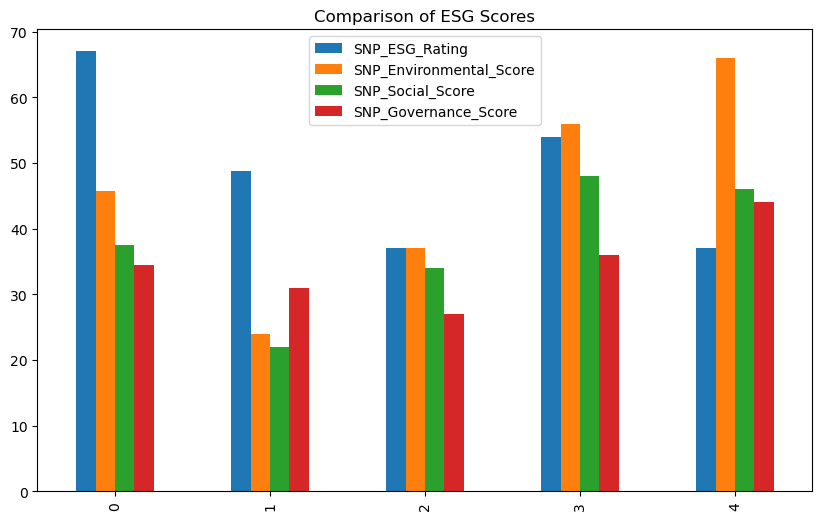

In [48]:
df2[['SNP_ESG_Rating', 'SNP_Environmental_Score', 'SNP_Social_Score', 'SNP_Governance_Score']].plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of ESG Scores')
plt.show()

#####  Insights
--- Overall ESG Rating (SNP_ESG_Rating):

The SNP_ESG_Rating (blue bars) is consistently the highest across all categories, indicating a higher aggregate ESG performance compared to individual scores in environmental, social, or governance areas.

---Environmental Scores:

- SNP_Environmental_Score (orange bars) shows significant variation across categories. It's the highest among all ESG components in categories 3 and 4, suggesting strong environmental performance in these groups.

---- Social and Governance Scores:

SNP_Social_Score (green bars) and SNP_Governance_Score (red bars) have similar levels in most categories, but the social score is generally higher than the governance score.
In category 0, the SNP_Governance_Score is relatively high compared to other categories, possibly indicating stronger governance practices in that category.

---Variation Across Categories:

- There is a noticeable variation in ESG scores across the different categories, indicating diverse ESG profiles or performance levels. Category 0 has the highest overall ESG rating, with a notable drop in environmental and governance scores in categories 1 and 2.
The consistency of the SNP_ESG_Rating being higher suggests it may be a composite measure that captures broader factors beyond individual environmental, social, or governance metrics.

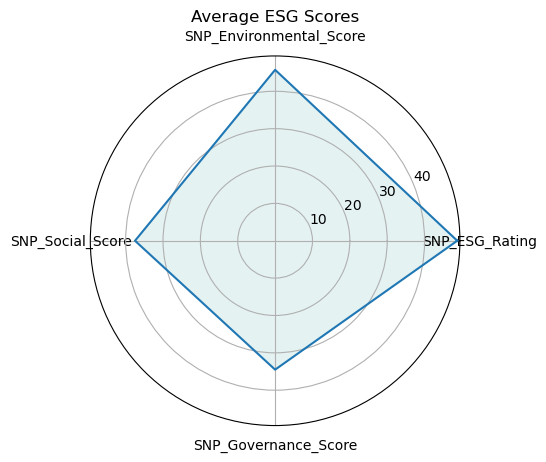

In [50]:
import numpy as np
from math import pi

categories = ['SNP_ESG_Rating', 'SNP_Environmental_Score', 'SNP_Social_Score', 'SNP_Governance_Score']
values = df2[categories].mean().values.flatten().tolist()

values += values[:1]
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories)
ax.plot(angles, values)
ax.fill(angles, values, 'teal', alpha=0.1)
plt.title('Average ESG Scores')
plt.show()

#####  Insights
- The SNP_ESG_Rating is the highest, indicating a strong overall ESG performance. However, there's a noticeable drop in the SNP_Governance_Score, suggesting that governance is the weakest area among the ESG components. The Environmental and Social Scores are relatively balanced, showing similar levels of performance in these areas.

<Figure size 1000x600 with 0 Axes>

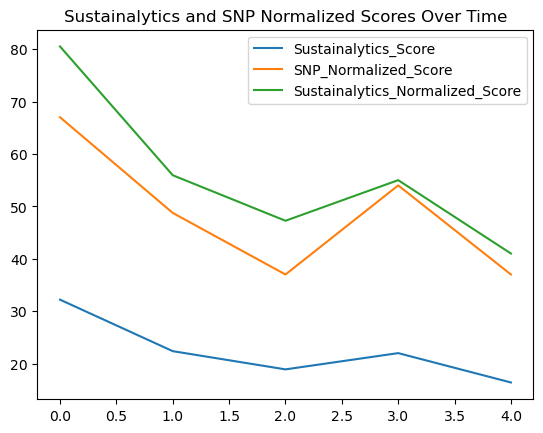

In [69]:
# 7. Line Plot: Sustainalytics_Score, SNP_Normalized_Score, Sustainalytics_Normalized_Score
plt.figure(figsize=(10, 6))
df2[['Sustainalytics_Score', 'SNP_Normalized_Score', 'Sustainalytics_Normalized_Score']].plot(kind='line')
plt.title('Sustainalytics and SNP Normalized Scores Over Time')
plt.show()

#####  Insights
---General Trend:

- All three scores (Sustainalytics, SNP Normalized, Sustainalytics Normalized) exhibit a general downward trend over time.

---Specific Observations:

- Sustainalytics Score: Starts relatively high and decreases steadily over time.
- SNP Normalized Score: Begins with a sharp decline, levels off around the middle, and then decreases again towards the end.
- Sustainalytics Normalized Score: Shows a more gradual decline compared to the other two scores.

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

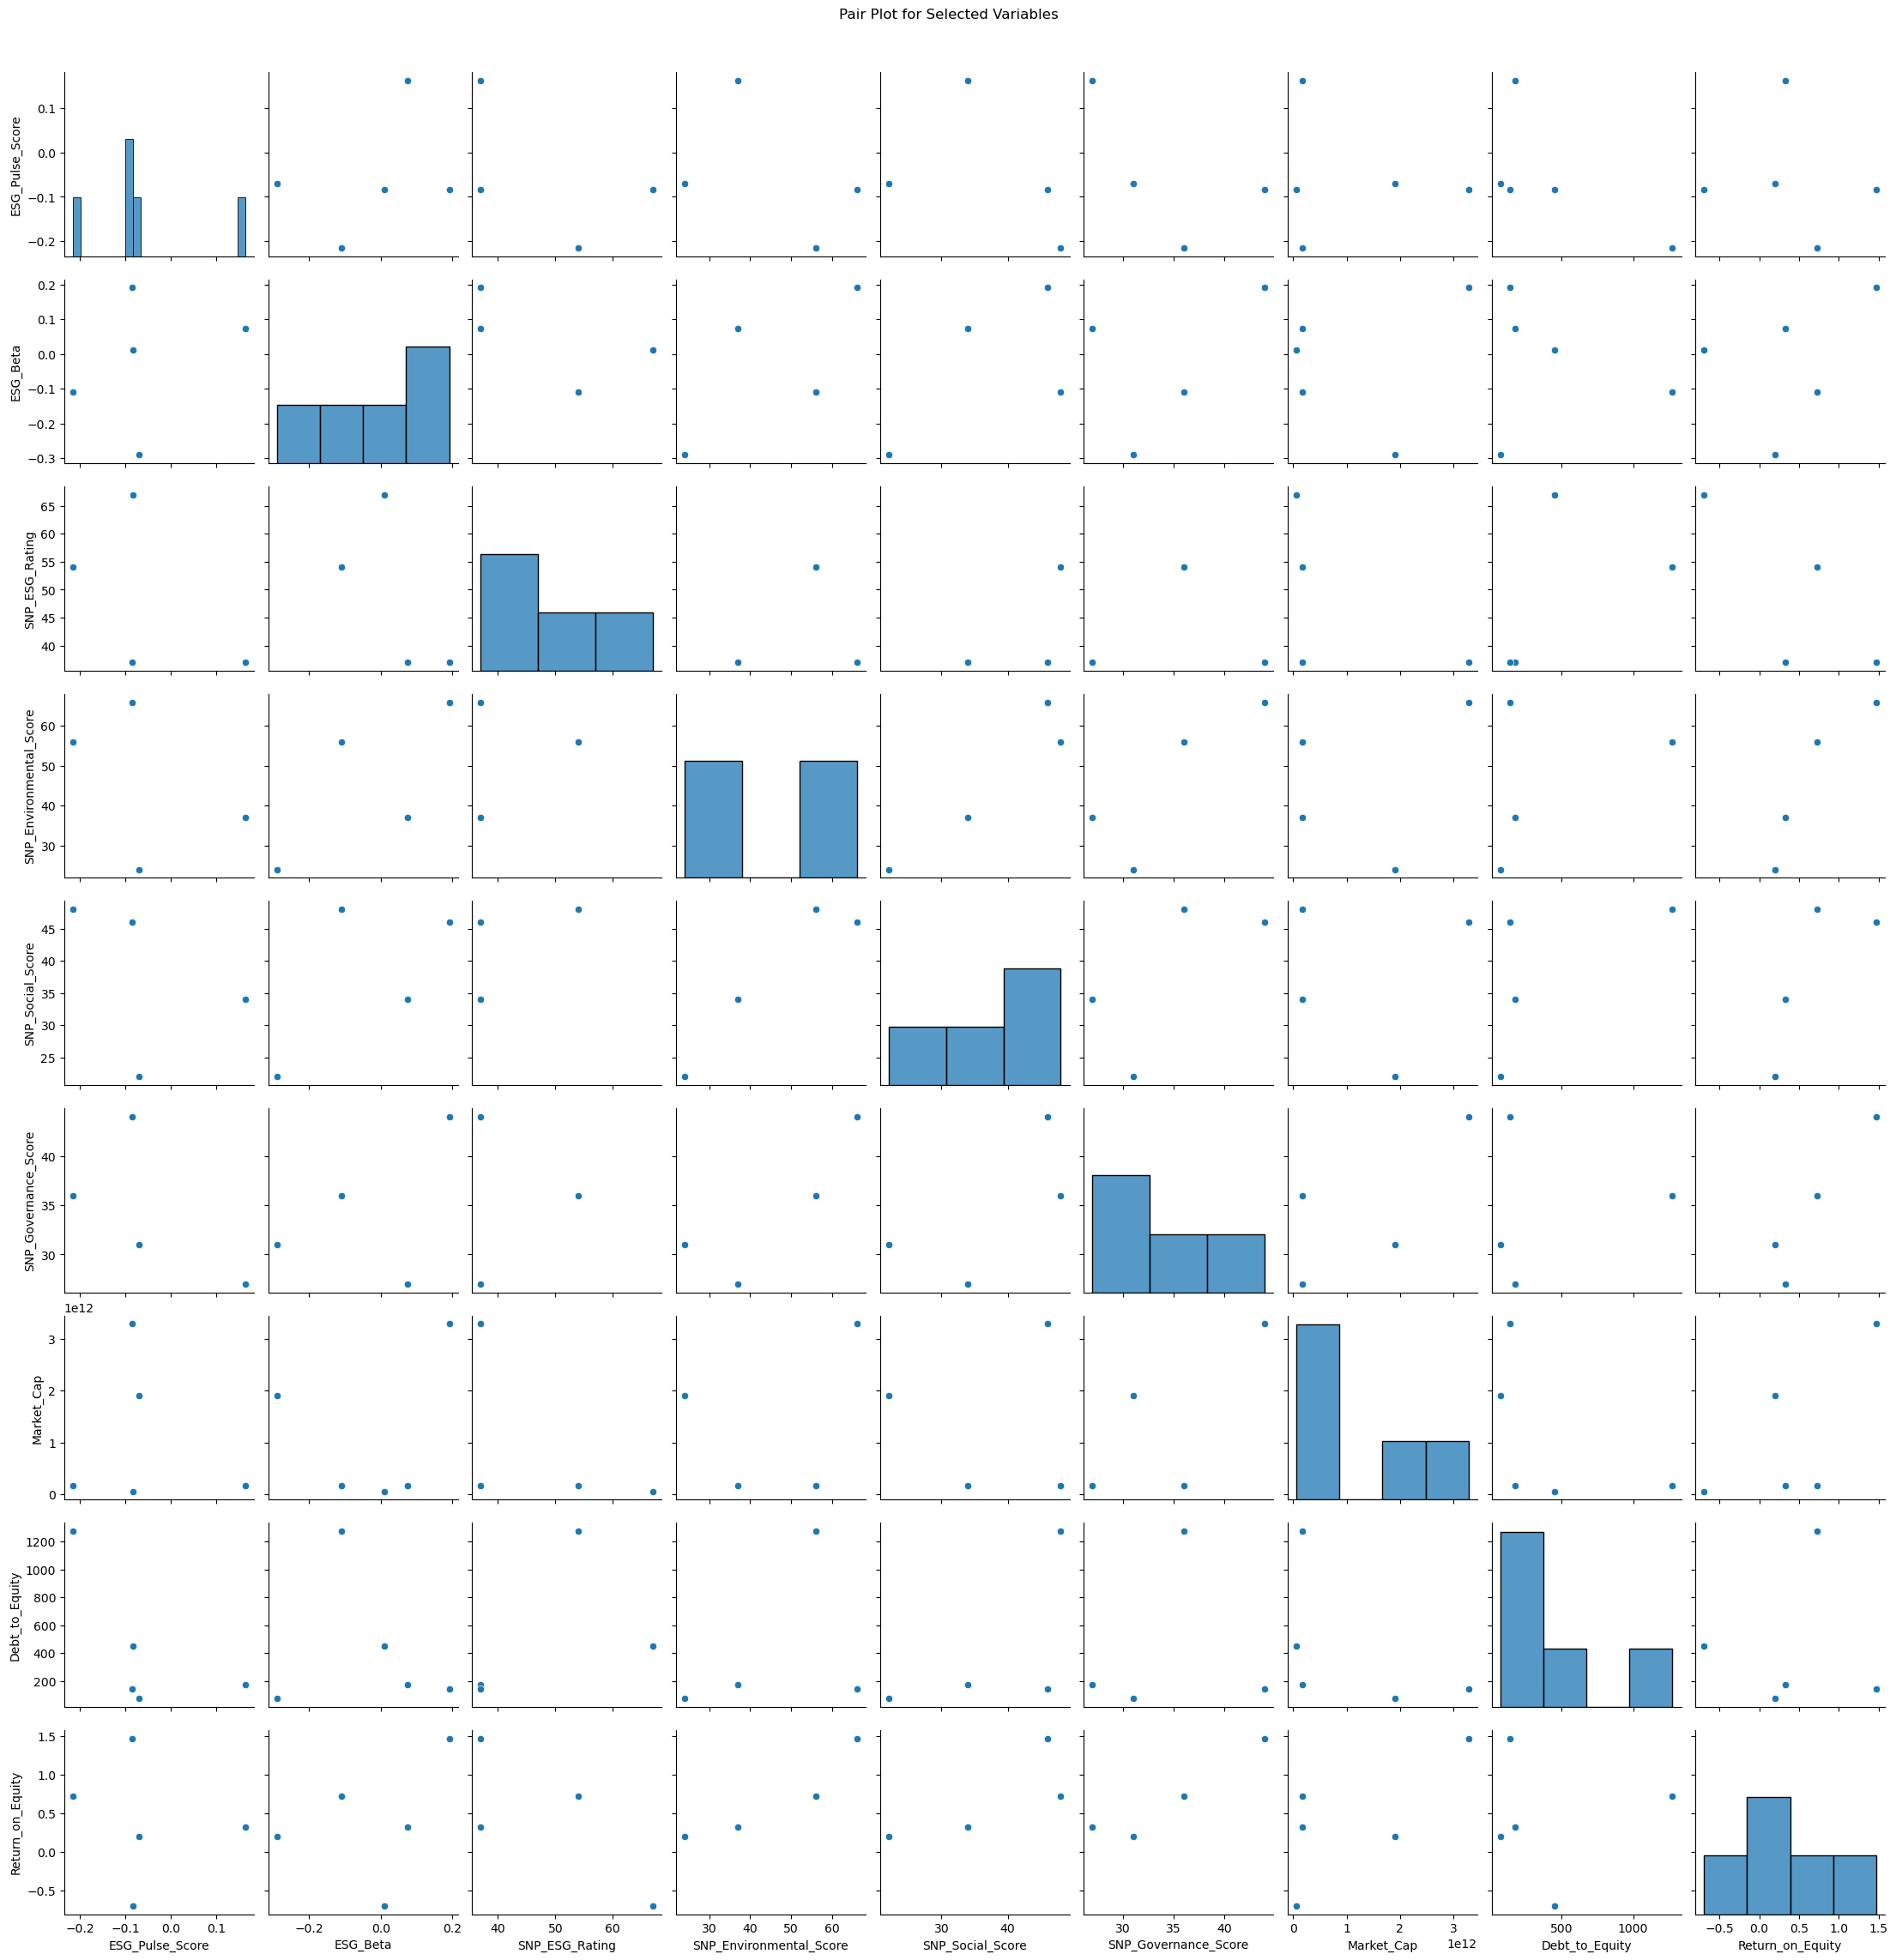

In [63]:
selected_columns = [
    'ESG_Pulse_Score', 'ESG_Beta', 'SNP_ESG_Rating', 'SNP_Environmental_Score', 
    'SNP_Social_Score', 'SNP_Governance_Score', 'Market_Cap', 
    'Debt_to_Equity', 'Return_on_Equity'
]

# Create the pair plot
sns.pairplot(df2[selected_columns])
plt.suptitle('Pair Plot for Selected Variables', y=1.02)
plt.show()

#### Insights
## Key Insights from the Plot:
Based on the visual patterns in the correlation matrix, we can infer the following:

## Strong Positive Correlations:

--- There seem to be strong positive correlations between:
- SNP ESG Rating and SNP Environmental Score
- SNP ESG Rating and SNP Social Score
- SNP ESG Rating and SNP Governance Score This suggests that companies with higher overall ESG ratings tend to have better performance in environmental, social, and governance aspects.

---Strong Negative Correlations:

- We observe a strong negative correlation between Debt to Equity and Market Cap. This indicates that companies with higher debt-to-equity ratios generally have smaller market capitalizations.

---Weak or No Correlations:

- Most of the other variables seem to have weak or no correlations with each other, as indicated by the lighter colors in the matrix.